### Bernouli_Trials

In [15]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    n_success = 0
    for i in range(n):
        random_number=np.random.random()#range[0,1]
        if random_number<p:
            n_success+=1
    return n_success

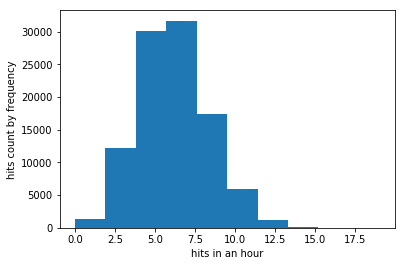

In [64]:
sample=np.random.binomial(60,0.1,100000)
_=plt.hist(sample)
_=plt.xlabel('hits in an hour')
_=plt.ylabel('hits count by frequency')
plt.show()

In [14]:
#Example below will show:

#100 transactions, probablity default rate for each transaction is 5%
#simulate*1000

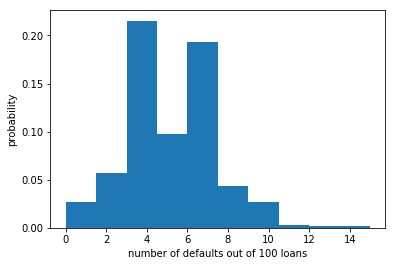

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n_defaults=np.empty(1000)

for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)

_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

plt.show()

### Possion Process

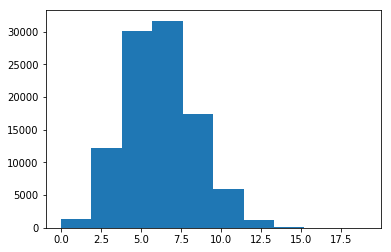

In [79]:
#Only 1 parameter!
#this period is independent with next period
#average hits in a period of time-->n*p(60*0.1)=6
samples_poisson=np.random.poisson(6,10000)#sample*10000
_=plt.hist(sample)
plt.show()

### Normal(Gaussian) Distribution

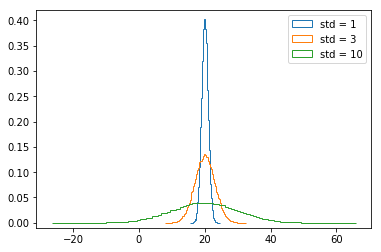

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1=np.random.normal(20,1,100000)
samples_std3=np.random.normal(20,3,100000)
samples_std10=np.random.normal(20,10,100000)

_=plt.hist(samples_std1,normed=True,histtype='step',bins=100)
_=plt.hist(samples_std3,normed=True,histtype='step',bins=100)
_=plt.hist(samples_std10,normed=True,histtype='step',bins=100)

_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

In [76]:
#racing time follow normal distribution

In [75]:
#mu,sample get from historical data
mu,sigma=149.22101123595507,1.627816471774816

samples=np.random.normal(mu,sigma,1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob=sum([1 for x in samples if x<144])/len(samples)

print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000695


### Exponential Distrbution

Exponential: A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, 
and the waiting time between arrivals of a Poisson process is Exponentially distributed.
#rare events的等候时间 满足Exponential Distrbution
#一段时间内rare events，满足Possion Process(one parameter)

In [87]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes.
    tau1 两次rare events平均发生时间：ex:750days
    """
    t1 = np.random.exponential(tau1, size=1)#正常到出rare events
    t2 = np.random.exponential(tau2, size=1)#正常到出rare events

    return t1 + t2

In [92]:
successive_poisson(764,715)

array([1462.41872736])